###                             Telco Customer Churn Dataset

#### Importing Dataset

In [4]:
import numpy as np
import pandas as pd

churn_df = pd.read_csv('Telco-Customer-Churn.csv')

In [5]:
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

#### Checking columns for missing values

In [6]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Comment:** There is not missing values. However, 'TotalCharges' column can be float64 data type. That column will be transformed.

In [7]:
#New customers do not have total payment column value. Therefore TotalCharges will be equal to MonthlyCharges
#With using numpy where function missing values are filled.

churn_df[churn_df.TotalCharges == ' ']
churn_df["TotalCharges"] = np.where(churn_df.TotalCharges == ' ', churn_df.MonthlyCharges, churn_df.TotalCharges)

In [8]:
#Data type changing to float like MonthlyCharges
churn_df.TotalCharges = churn_df.TotalCharges.astype("float64")

In [9]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Distribution of Numeric Datas

There are 4 columns with numerical datas. 
- SeniorCitizen 
- Tenure
- MonthlyCharges 
- TotalCharges

In [10]:
#importing data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 

#### Visualization of datas

**1) Senior Citizen**

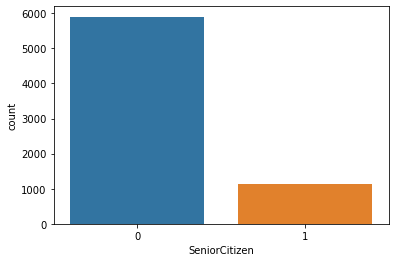

Percantage of Senior Citizens in Customers is 16.21 (Chart 1)


In [12]:
sns.countplot(churn_df.SeniorCitizen)
plt.show()

seniorPercentage = len(churn_df[churn_df.SeniorCitizen == 1])/len(churn_df) * 100
print("Percantage of Senior Citizens in Customers is {:.2f}".format(seniorPercentage), "(Chart 1)")

**Comment:** SeniorCitizen column only shows if customer is senior or not. Therefore only information is taken from here is percentage of senior customers.
No need to look for outliers in this data. It is int64 type data however, it is categorical variable.

**2) Tenure**

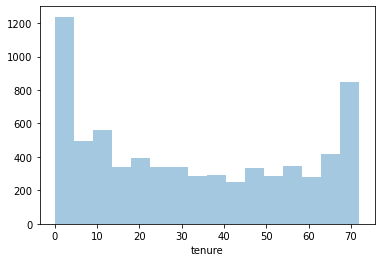

(Chart 2)


In [15]:
sns.distplot(churn_df.tenure, kde=False)
plt.show()
print("(Chart 2)")

Tenure data is distributed between 0 and 72. New customer and old customer bins have more customers than mean. However, our distribution look like have no outliers. To be sure box plot can be drawn.

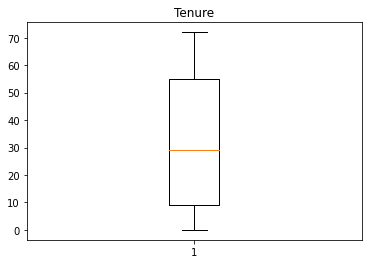

(Chart 3)


In [16]:
plt.boxplot(churn_df.tenure.dropna())
plt.title("Tenure")
plt.show()
print("(Chart 3)")

**Comment:** After drawing box plot it can be seen that tenure datas do not have outliers from 1,5 * away from first and third quarters.

**3) Monthly Charges**

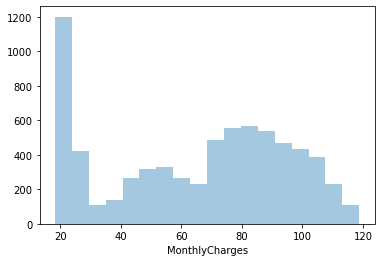

(Chart 4)


In [17]:
sns.distplot(churn_df.MonthlyCharges, kde=False)
plt.show()
print("(Chart 4)")

**Comment:** According to plot we cannot say no outliers. Therefore, keep searching for outliers. Let's use Z score method to detect outliers.

In [30]:
#importing zscore from scipy library
from scipy.stats import zscore
import scipy.stats as stats

In [31]:
z_scores_monthly = zscore(churn_df["MonthlyCharges"].dropna())
for threshold in range(1,5):
    print("Threshold value: {}".format(threshold))
    print("Number of Outliers: {}".format(len((np.where(z_scores_monthly > threshold)[0]))))
    print('------')

Threshold value: 1
Number of Outliers: 1324
------
Threshold value: 2
Number of Outliers: 0
------
Threshold value: 3
Number of Outliers: 0
------
Threshold value: 4
Number of Outliers: 0
------


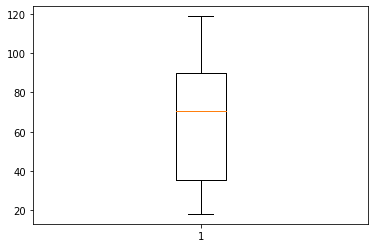

(Chart 5)


In [32]:
plt.boxplot(churn_df.MonthlyCharges)
plt.show()
print("(Chart 5)")

**Comment:** After Z score and boxplot analysis there is no outlier values in MonthlyCharges column.

**4) Monthly Charges**

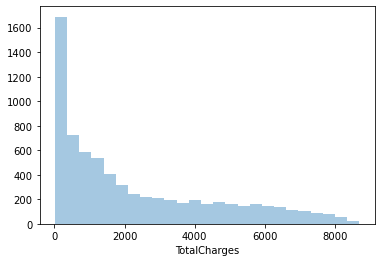

(Chart 6)


In [33]:
sns.distplot(churn_df.TotalCharges, kde=False)
plt.show()
print("(Chart 6)")

In [18]:
z_scores_total = zscore(churn_df["TotalCharges"].dropna())
for threshold in range(1,5):
    print("Threshold value: {}".format(threshold))
    print("Number of Outliers: {}".format(len((np.where(z_scores_total > threshold)[0]))))
    print('------')

Threshold value: 1
Number of Outliers: 1363
------
Threshold value: 2
Number of Outliers: 395
------
Threshold value: 3
Number of Outliers: 0
------
Threshold value: 4
Number of Outliers: 0
------


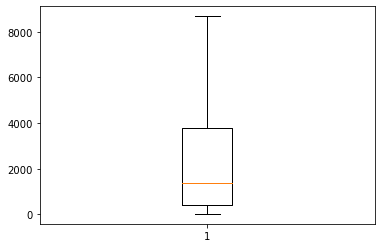

(Chart 7)


In [21]:
plt.boxplot(churn_df.TotalCharges.dropna())
plt.show()
print("(Chart 7)")

**Comment:** After Z score and boxplot analysis there is no outlier values in TotalCharges column.

## Univariate Analysis

In [20]:
churn_df.describe(include=['O'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,3642-GKTCT,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


## Multivariate Analysis

In [23]:
churn_df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102997
tenure,0.016567,1.000000,0.247900,0.826164
MonthlyCharges,0.220173,0.247900,1.000000,0.651182
TotalCharges,0.102997,0.826164,0.651182,1.000000


In [24]:
movie_mat_youtube = churn_df.corr()
display(movie_mat_youtube)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102997
tenure,0.016567,1.000000,0.247900,0.826164
MonthlyCharges,0.220173,0.247900,1.000000,0.651182
TotalCharges,0.102997,0.826164,0.651182,1.000000


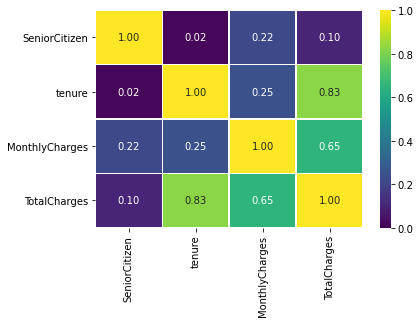

(Chart 8)


In [25]:
sns.heatmap(movie_mat_youtube, annot=True, fmt='.2f', annot_kws={'size': 10}, linewidth=0.5, vmin=0, vmax=1, cmap='viridis')
plt.show()
print("(Chart 8)")

**Comment:** After applying pandas correlation and visualizating with seaborn, only information is tenure and total charge is correlated which is obvious. Customers total charge will be increased by membership time .

**Lets draw Tenure - Monthly charge correlation which is 0.25**

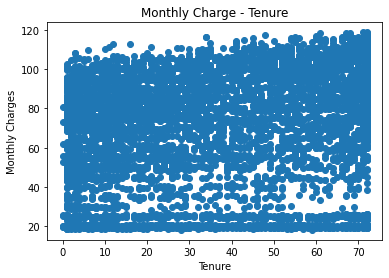

(Chart 9)


In [26]:
plt.scatter(churn_df.tenure, churn_df.MonthlyCharges)
plt.title('Monthly Charge - Tenure')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.show()
print("(Chart 9)")

Sns ile yaparsak bir eksen daha ekleyebiliriz. Hue gibi kullanarak.

**Comment:** Correlation between tenure & monthly charges per customer is not high

**Senior Citizen and Other Numeric Columns Relations**

In [25]:
churn_df.groupby('SeniorCitizen').mean().T

SeniorCitizen,0,1
tenure,32.192171,33.295972
MonthlyCharges,61.847441,79.820359
TotalCharges,2177.101008,2810.465193


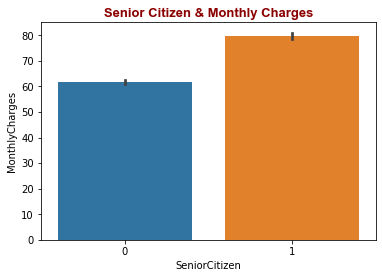

(Chart 10)


In [28]:
sns.barplot(y=churn_df.MonthlyCharges, x=churn_df.SeniorCitizen)
plt.title('Senior Citizen & Monthly Charges', fontdict=title_font)
plt.show()
print("(Chart 10)")

In [34]:
#SeniorCitizen ile MonthlyCharges ilişkileri
ttest = stats.ttest_ind(churn_df[churn_df.SeniorCitizen == 0]['MonthlyCharges'],
                       churn_df[churn_df.SeniorCitizen == 1]['MonthlyCharges'])
ttest

Ttest_indResult(statistic=-18.939656355795325, pvalue=4.574872175527315e-78)

**Relationship between Churn and Columns**

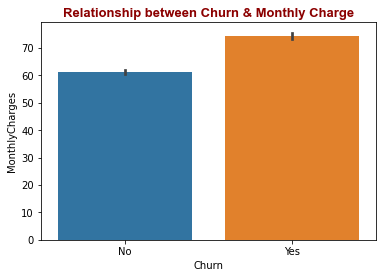

(Chart 11)


In [35]:
sns.barplot(churn_df.Churn, churn_df.MonthlyCharges)
plt.title('Relationship between Churn & Monthly Charge', fontdict=title_font)
plt.show()
print("(Chart 11)")

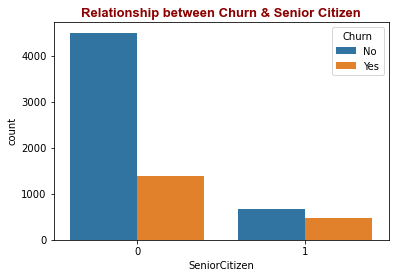

(Chart 12)


In [60]:
sns.countplot(churn_df.SeniorCitizen, hue=churn_df.Churn)
plt.title('Relationship between Churn & Senior Citizen', fontdict=title_font)
plt.show()
print("(Chart 12)")

Senior Citizenler Churn etmeye daha meyilliler.

Churn edenler aylık bazda daha fazla para ödeyenler

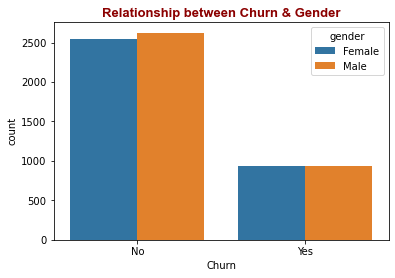

(Chart 13)


In [61]:
sns.countplot(churn_df.Churn, hue=churn_df.gender)
plt.title('Relationship between Churn & Gender', fontdict=title_font)
plt.show()
print("(Chart 13)")

Cinsiyet açısından bakılınca Churn edenler arasında anlamlı bir fark gözükmüyor.

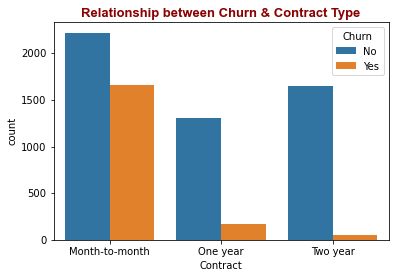

(Chart 14)


In [38]:
sns.countplot(churn_df.Contract, hue=churn_df.Churn)
plt.title('Relationship between Churn & Contract Type', fontdict=title_font)
plt.show()
print("(Chart 14)")

Kontrat tiplerine göre en çok aydan aya ödeme yapanlar churn ediyor.

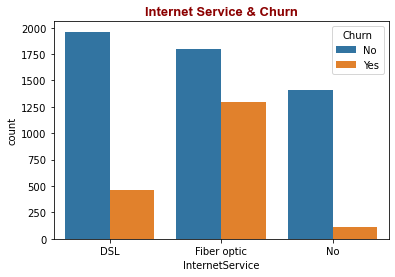

(Chart 15)


In [39]:
sns.countplot(churn_df.InternetService, hue=churn_df.Churn)
plt.title('Internet Service & Churn', fontdict=title_font)
plt.show()
print("(Chart 15)")

İnternet hizmeti alanlarda kalite arttıkça churn artıyor. Almayanlar en sadık müşteriler.

In [40]:
gender_churn = pd.crosstab(churn_df.gender, churn_df.Churn)
gender_churn

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


In [41]:
#Getting categoric columns from dataframe and removing customerid which is unique for each customer.
categoricColumns = churn_df.select_dtypes('object').columns.tolist()
categoricColumns.pop(0)
len(categoricColumns)

16

In [42]:
#Creating a new dataframe to concat new numerical columns on. 
numeric_df = pd.DataFrame()
#By using a loop concating all columns in a df
for var in categoricColumns:
    numeric_df = pd.concat([numeric_df, pd.get_dummies(churn_df[var], prefix=var)], axis=1)
numeric_df

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,1,0,0,1,1,0,1,0,0,1,...,0,0,0,1,0,0,1,0,1,0
1,0,1,1,0,1,0,0,1,1,0,...,1,0,1,0,0,0,0,1,1,0
2,0,1,1,0,1,0,0,1,1,0,...,0,0,0,1,0,0,0,1,0,1
3,0,1,1,0,1,0,1,0,0,1,...,1,0,1,0,1,0,0,0,1,0
4,1,0,1,0,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,0,1,0,1,0,1,0,0,...,1,0,0,1,0,0,0,1,1,0
7039,1,0,0,1,0,1,0,1,0,0,...,1,0,0,1,0,1,0,0,1,0
7040,1,0,0,1,0,1,1,0,0,1,...,0,0,0,1,0,0,1,0,1,0
7041,0,1,0,1,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1


**Comment:** After converting categorical columns to numerical columns 16 columns are now 43 numerical columns.

In [43]:
#Adding numerical columns and original dataframe to new df.
new_churn_df = pd.concat([churn_df, numeric_df], axis=1)
new_churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,0,0,0,1,0,0,1,0,1,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,1,0,1,0,0,0,0,1,1,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,0,0,0,1,0,0,0,1,0,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,1,0,1,0,1,0,0,0,1,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,0,0,0,1,0,0,1,0,0,1


In [44]:
#Calculating correlation matrix with new numerical columns.
numeric_churn_correlation = new_churn_df.corr()

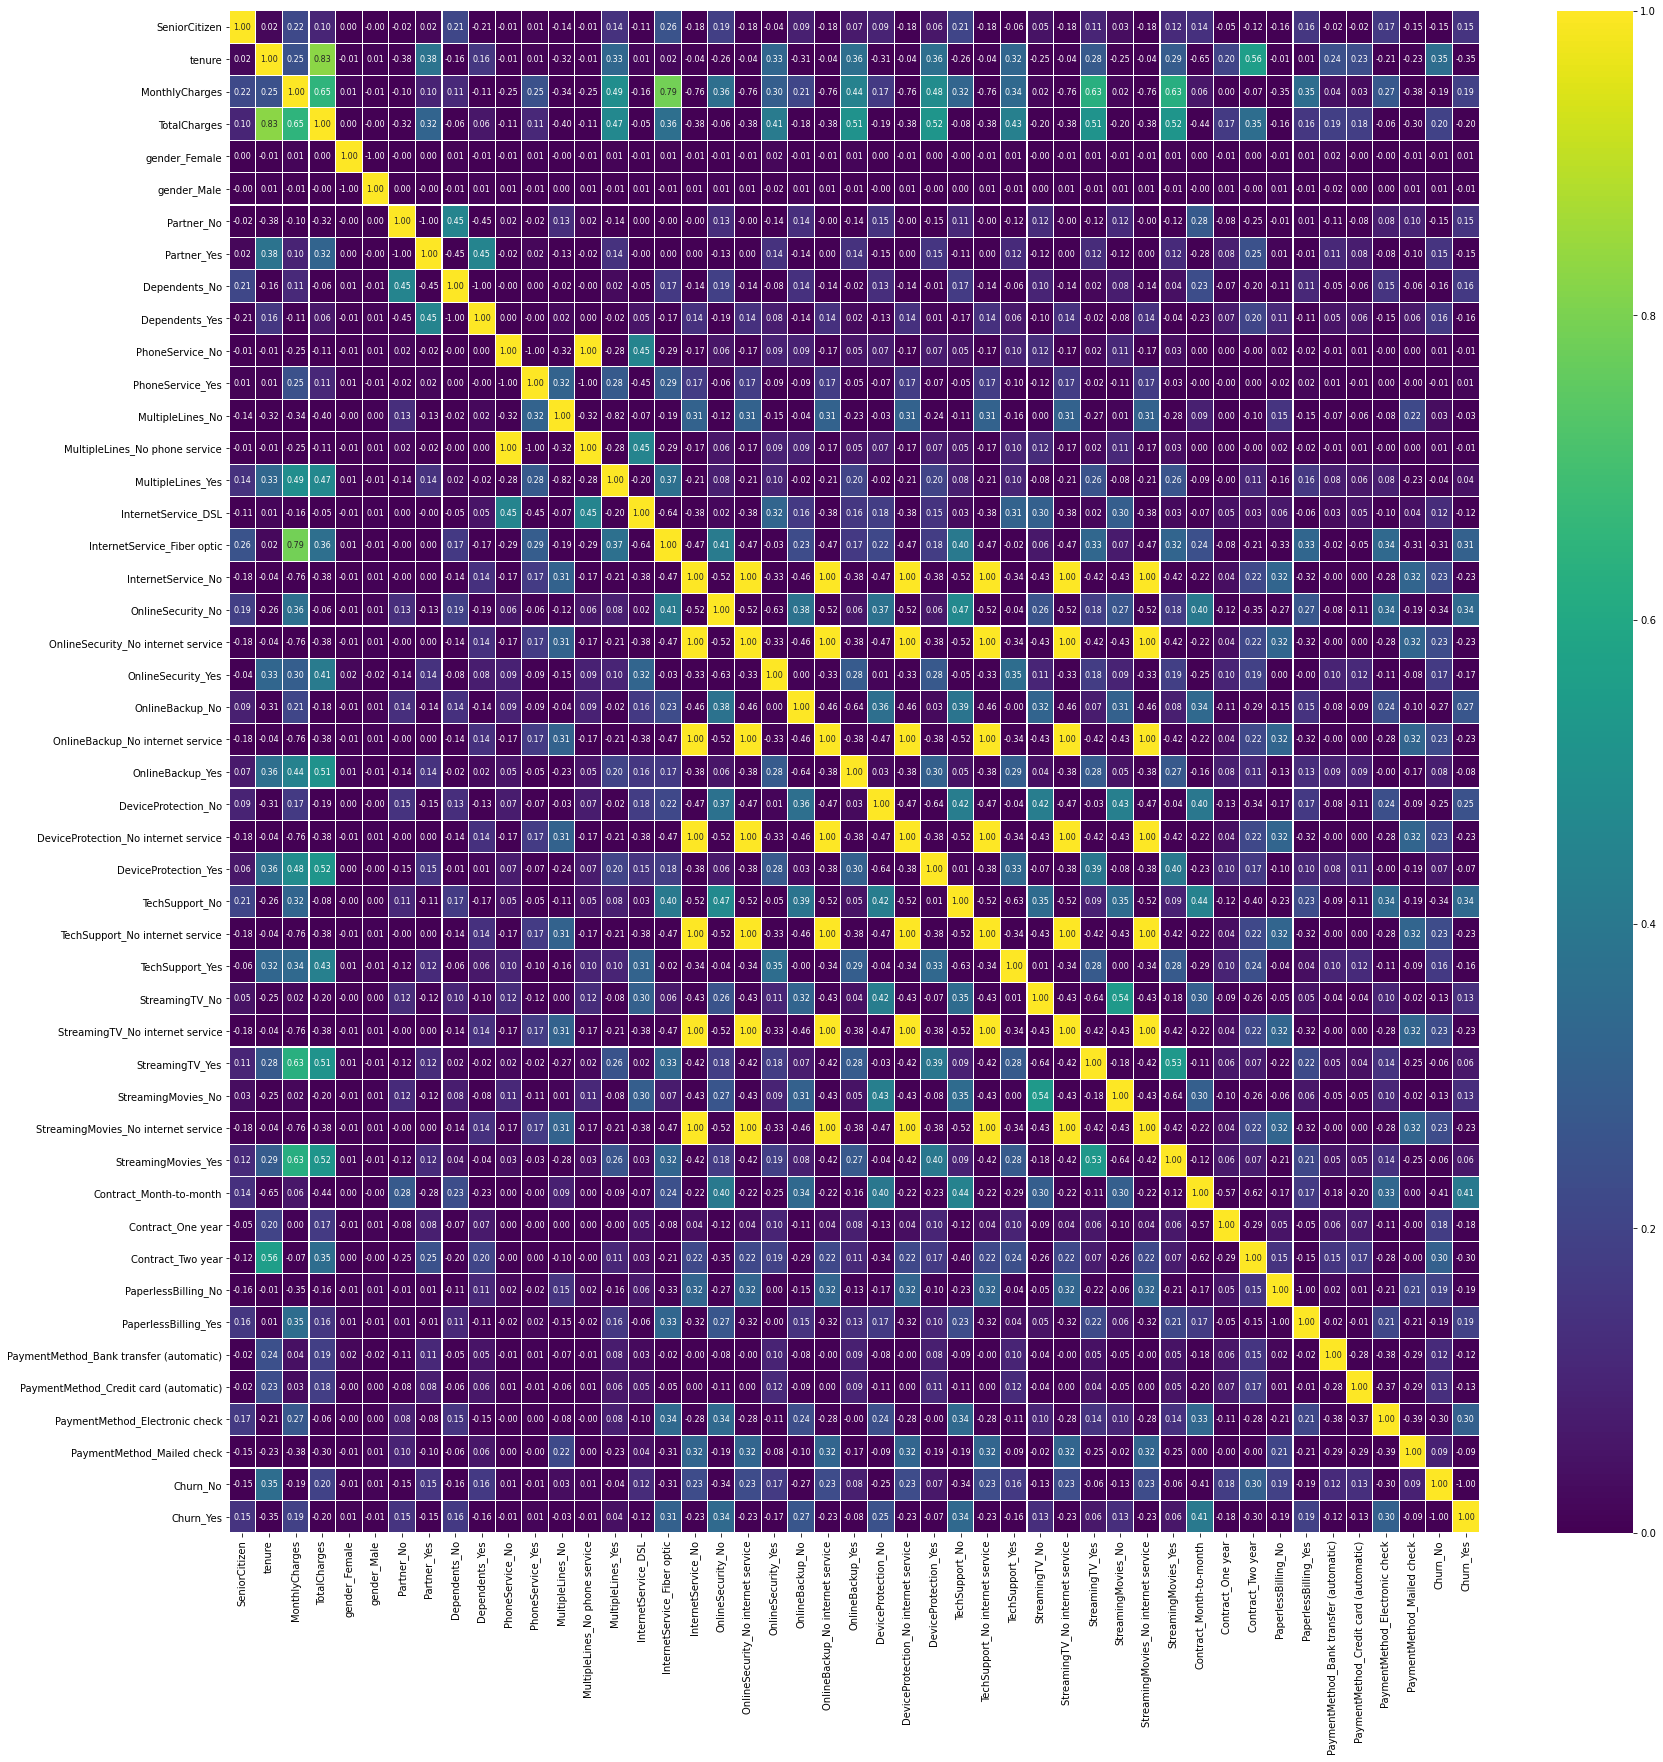

(Chart 17)


In [45]:
#Drawing heatmap of numerical values of all columns.
plt.figure(figsize=(28,28))
sns.heatmap(numeric_churn_correlation, annot=True, fmt='.2f', annot_kws={'size': 8}, linewidth=0.1, vmin=0, vmax=1, cmap='viridis')
plt.show()
print("(Chart 17)")

**Comment:** There is no high correlation between churn and other columns. However some of the columns are related since they show information related to internet connection. Therefore, correlation = 1 is get from chart.

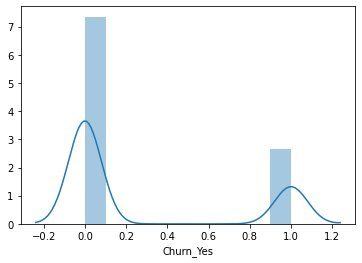

(Chart 18)


In [46]:
sns.distplot(new_churn_df.Churn_Yes)
plt.show()
print("(Chart 18)")

In [47]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

In [48]:
jb_stats = jarque_bera(new_churn_df.Churn_Yes)
jb_stats

Jarque_beraResult(statistic=1548.2548951013493, pvalue=0.0)

**Comment:** Normallik kategorik değişkenlerde aranamayacağı için bu testi yapmamızın bir anlamı bulunmamaktadır.

To understand relationship with total services customer pays and churn, new column for total services customer uses will be creating by adding new numerical columns. 

In [49]:
new_churn_df['TotalServiceUsage'] = new_churn_df.PhoneService_Yes + new_churn_df.MultipleLines_Yes +new_churn_df.InternetService_DSL + new_churn_df['InternetService_Fiber optic'] +new_churn_df.OnlineSecurity_Yes + new_churn_df.OnlineBackup_Yes + new_churn_df.DeviceProtection_Yes + new_churn_df.TechSupport_Yes + new_churn_df.StreamingTV_Yes+ new_churn_df.StreamingMovies_Yes

new_churn_df.TotalServiceUsage.describe()

count    7043.000000
mean        4.146244
std         2.312720
min         1.000000
25%         2.000000
50%         4.000000
75%         6.000000
max         9.000000
Name: TotalServiceUsage, dtype: float64

**Comment:** Telco customers buy 4.1 products in average. Min 1 which means customers buy either phone or internet service.

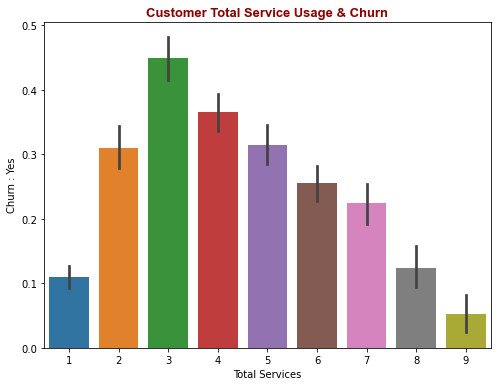

(Chart 19)


In [50]:
plt.figure(figsize=(8,6))
sns.barplot(x=new_churn_df.TotalServiceUsage, y=new_churn_df.Churn_Yes)
plt.title('Customer Total Service Usage & Churn',fontdict=title_font)
plt.xlabel('Total Services')
plt.ylabel('Churn : Yes')
plt.show()
print("(Chart 19)")

In [51]:
ttest2 = stats.ttest_ind(new_churn_df[new_churn_df["TotalServiceUsage" ]== 3]["Churn_Yes"],
                       new_churn_df[new_churn_df["TotalServiceUsage" ]== 9]["Churn_Yes"])
ttest2

Ttest_indResult(statistic=11.20386730722751, pvalue=1.3280911115535764e-27)

**Comment:** Bar plot shows that customers with 1 service subscription and more than 7 subscription are tend to stay loyal to company.
T-test shows there is a significant difference between means of 3 subscription and 9 subscription

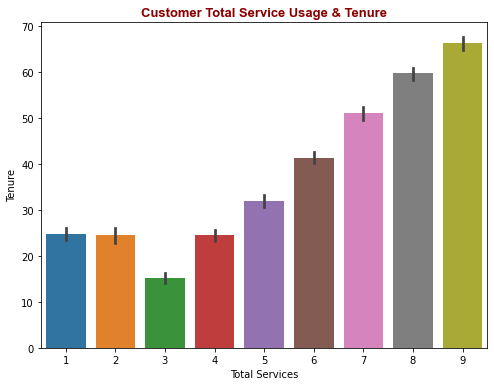

(Chart 20)


In [52]:
plt.figure(figsize=(8,6))
sns.barplot(x=new_churn_df.TotalServiceUsage, y=new_churn_df.tenure)
plt.title('Customer Total Service Usage & Tenure',fontdict=title_font)
plt.xlabel('Total Services')
plt.ylabel('Tenure')
plt.show()
print("(Chart 20)")

**Comment:** As expected tenure is higher for more services customer use. And churn is low.

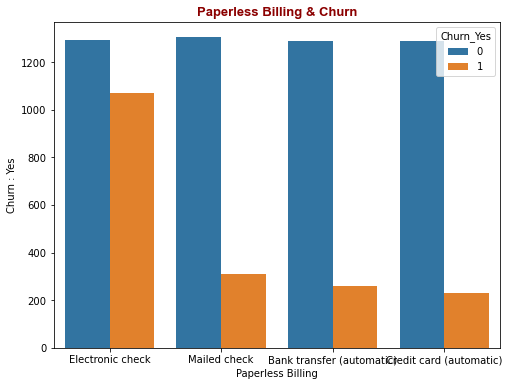

(Chart 21)


In [63]:
plt.figure(figsize=(8,6))
sns.countplot(new_churn_df.PaymentMethod, hue=new_churn_df.Churn_Yes)
plt.title('Paperless Billing & Churn',fontdict=title_font)
plt.xlabel('Paperless Billing')
plt.ylabel('Churn : Yes')
plt.show()
print("(Chart 21)")

In [67]:
new_churn_df[new_churn_df["PaymentMethod_Electronic check"] ==1].Churn_Yes.mean()
new_churn_df[new_churn_df["PaymentMethod_Mailed check"] ==0].Churn_Yes.mean()

0.2874240471368072

In [69]:
ttest3 = stats.ttest_ind(new_churn_df[new_churn_df["PaymentMethod_Electronic check"] ==1].Churn_Yes,
                       new_churn_df[new_churn_df["PaymentMethod_Electronic check"] ==0].Churn_Yes)
ttest3

Ttest_indResult(statistic=26.574330250859195, pvalue=2.2968899851043027e-148)

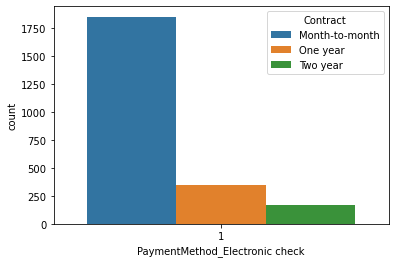

(Chart 22)


In [75]:
sns.countplot(new_churn_df[new_churn_df["PaymentMethod_Electronic check"]== 1]["PaymentMethod_Electronic check"], hue= new_churn_df.Contract)
plt.show()
print("(Chart 22)")

# Report

### Missing Values and Outliers

- There were only 1 column with missing values, TotalCharges, it is filled with MonthlyCharges value. Since it is first month of customers.
- 4 column is numerical and 1 of them,SeniorCitizen, was categorical but shown as numerical. I kept it that way.
- There is not outlier value in other 3 numerical columns.


### Relationship with Churn

Monthly payments are major parts of contracts. Money is the main negotiation point of most of the deals. Therefore, I started investigating churn relationship with money.

- Monthly payment can be lower for older customers which is expected since they are loyal for some time. However, it is not the case as it seen on chart 9.
- On the other hand, Senior citizens pays more than 10$ from not senior citizens. And customer that churn pays more than not churn customers. Therefore senior citizens more likely to churn which can be seen on chart 10, 11, 12

Customer that have shorter terms of contracts more likely to leave Telco. Chart 14

If internet users of Telco analyzed "Fiber optic" users have the highest churn rate. (Chart 15) The problem about fiber optic internet is a new research question for Telco. There can be problem in fiber optic section for wide range of users.


### Turning categorical columns to numerical values

By using get_dummies method, I gave 0s and 1s for each column and that increased total column number from 16 to 43.

Heatmap for the new numeric categories (Chart 17) shows that there is correlation between tenure-MotalCharges, MonthlyCharges-TotalCharges which are obvious, since they increase by time.

After that I did normality test for categorical values and it show columns are normally distributed. However, doing a normality test and PCA is not possibble for this data. I stopped after one feature.

I created a new feature by adding all services Telco has. TotalServiceUsage shows, a customer pays for how many services. 
Churn and Total service usage is not correlated, but has an information. Customers which have 1 or 9 service payments are not likely to churn, However when they have 3 service usage, they will leave Telco with 50%. So Telco should not give extra time to customers that have 1 or 9 services, they should try to sell more service to customers that have 3 service subsctiption.

Lastly, Electronic check has a high Churn rate. If it is analyzed closely, t-test show there is significant difference between Electronic check and others. And most of the electronic check payers have month to month contract. Monthly contract and electronic check effect churn.